___
# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Nombre: </Strong>  <font color="blue"> Viviana Toledo De la Fuente </font>
- <Strong> Fecha </Strong>: 25/08/2024. 
- <Strong> Correo: </Strong>  <font color="blue"> viviana.toledo@iteso.mx </font>
___


### <font color= #2E9AFE> Tarea 1: Descripción de conjuntos de datos</font>

El conjunto de datos “adult data” puede encontrarse en el repositorio “UC Irvine Machine Learning Repository” (https://archive.ics.uci.edu/dataset/2/adult).

En 1994, se realizó un censo de personas adultas. Se extrajo un conjunto de datos razonablemente limpios. 

El objetivo de predicción es determinar si una persona gana más de 50K USD al año. 

Se cuenta con las siguientes variables:

- age
- workclass 
- fnlwgt
- education 
- education-num
- marital-status 
- occupation 
- relationship
- race 
- sex 
- capital-gain
- capital-loss
- hours-per-week
- native-country
- 50K, <=50K

La tarea consiste en responder las siguientes preguntas:

1. ¿Existen datos nulos? Si los hay, ¿cómo los reemplazarías?
2. ¿Cuántos hombres y mujeres están representados en este conjunto de datos?
3. ¿Cuál es la edad promedio de una mujer y un hombre?
4. ¿Cuáles son el promedio y la desviación estándar de la edad de quienes reciben más de 50K por año (salario) y de quienes reciben menos de 50K por año? ¿Qué puedes concluir de esto?
5. ¿Es cierto que todas las personas que ganan más de 50K tienen al menos educación secundaria? (Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters o Doctorate)
6. ¿Quién gana más dinero >50K, hombres casados o solteros? (característica de marital-status)? Considere como casados a aquellos que tienen un estado civil que comienza con Married (Married-civ-spouse, Married-spouse-absent o Married-AF-spouse), el resto se consideran solteros.
7. ¿Cuál es el número máximo de horas que trabaja una persona por semana (hours-per-week)? ¿Cuántas personas trabajan esa cantidad de horas y cuál es el porcentaje de los que ganan mucho entre ellos?
8. Cuenta el tiempo promedio de trabajo (hours-per-week) de quienes ganan poco y mucho (salario) para cada país (native-country).
9. Si fueras a hacer un modelo, ¿qué variables crees que no haría sentido agregar al análisis?
9. ¿Los datos necesitan algún tipo de escalamiento? Si es así, ¿qué método de escalamiento utilizarías y porqué?
10. ¿Cuál es la proporción de personas que ganan más de 50K por año comparado con las que ganan menos de 50K?
11. Dado todo el análisis que hiciste (y si gustas agregar más cosas para poder hacer la conclusión), ¿cuáles son los factores/razones que definirías para decir que una persona puede tener un salario más alto?

Descripción de la entrega.

- El entregable de esta tarea comprende de un documento; un archivo en Jupyter Notebook donde se respondan las preguntas mencionadas anteriormente con el código que se usó para responder las preguntas. 

- El documento debe incluir al menos los siguientes puntos:

o Indicar el nombre de la tarea que se resuelve.

o Nombre del estudiante que entrega el documento.

o Sección introducción. Describe lo que se pretende resolver con esta tarea.

o Sección desarrollo. Responder las preguntas y explica el procedimiento que se siguió para conseguirlo.

o Sección conclusiones. Incluye un comentario de los resultados que se obtuvieron.

Fecha de Entrega: Viernes 30 de Agosto antes de las 11:59 p.m.

-----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv('../data/raw/tarea1/adult.data', na_values=' ?', header=None)
df.columns = ['age', 'workclass', 'final-weight', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Desarrollo

#### 1. ¿Existen datos nulos? Si los hay, ¿cómo los reemplazarías?

<Axes: >

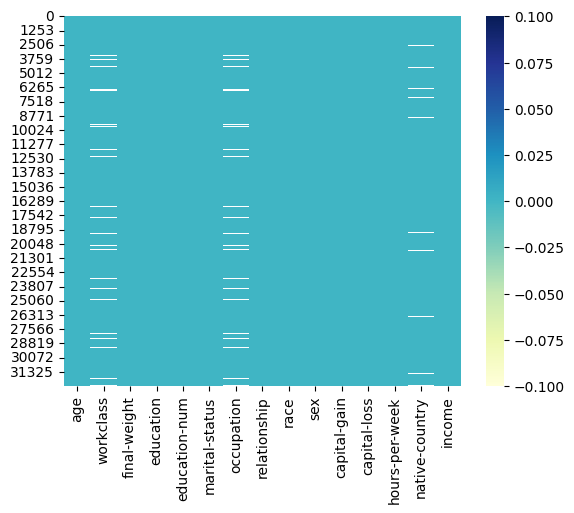

In [2]:
# Visualización de datos faltantes
sns.heatmap(df.isna(), cmap="YlGnBu", mask=df.isna())

In [3]:
# Tipos de datos faltantes
df[['workclass', 'occupation', 'native-country']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       30725 non-null  object
 1   occupation      30718 non-null  object
 2   native-country  31978 non-null  object
dtypes: object(3)
memory usage: 763.3+ KB


Hay 3 columnas en el dataset que tienen datos faltantes: workclass, occupation y native country. Ninguna contiene suficientes valores faltantes para justificar que sean eliminadas por completo, pero podemos utilizar técnicas de rellenado.

Debido a que las 3 features son categóricas, lo correcto sería implementar un rellenado por moda.

#### 2. ¿Cuántos hombres y mujeres están representados en este conjunto de datos?

In [4]:
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

Hay 21,790 hombres y 10,771 mujeres. Los hombres están representados un 100% más que las mujeres, por lo que existe un oversampling en esta categoría.

#### 3. ¿Cuál es la edad promedio de una mujer y un hombre?

In [5]:
# Dividiendo en grupos
female = df[df["sex"].str.contains("Female")]
male = df[df["sex"].str.contains("Male")]

# Obteniendo el promedio de la edad por grupo
print(f'La edad promedio de las mujeres es: {female["age"].mean().round()} \n')
print(f'La edad promedio de los hombres es: {male["age"].mean().round()}')

La edad promedio de las mujeres es: 37.0 

La edad promedio de los hombres es: 39.0


#### 4. ¿Cuáles son el promedio y la desviación estándar de la edad de quienes reciben más de 50K por año (salario) y de quienes reciben menos de 50K por año? ¿Qué puedes concluir de esto?

In [6]:
# Analizando los valores en la feature
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [7]:
# Dividiendo en grupos
above_50k = df[df['income'].str.contains(">50K")]
below_50k = df[df['income'].str.contains("<=50K")]

# Medidas estadísticas
print('--Personas que reciben MÁS de 50k--')
print(f'Edad promedio: {above_50k["age"].mean().round()}')
print(f'Desviación estándar: {above_50k["age"].std()} \n')

print('--Personas que reciben MENOS de 50k--')
print(f'Edad promedio: {below_50k["age"].mean().round()}')
print(f'Desviación estándar: {below_50k["age"].std()}')

--Personas que reciben MÁS de 50k--
Edad promedio: 44.0
Desviación estándar: 10.519027719851826 

--Personas que reciben MENOS de 50k--
Edad promedio: 37.0
Desviación estándar: 14.02008849082488


Las personas que reciben más de 50K al año suelen ser más grandes en edad que aquelles que no por unos 7 años. Además, las edades varían menos que las personas que reciben menos de 50K al año. 

Esto indica que las personas que perciben menos de 50K al año tienen edades más variadas.

#### 5. ¿Es cierto que todas las personas que ganan más de 50K tienen al menos educación secundaria? (Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters o Doctorate)

In [8]:
above_50k['education'].value_counts()

education
Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: count, dtype: int64

Falso, existen personas que ganan más de 50K que solo han estudiado la primaria, aunque es un número MUY pequeño de personas. La mayoría han estudiado la universidad, preparatoria o algo de la universidad. 

In [9]:
below_50k['education'].value_counts()

education
HS-grad         8826
Some-college    5904
Bachelors       3134
11th            1115
Assoc-voc       1021
10th             871
Assoc-acdm       802
Masters          764
7th-8th          606
9th              487
12th             400
5th-6th          317
1st-4th          162
Prof-school      153
Doctorate        107
Preschool         51
Name: count, dtype: int64

En las personas que ganan menos de 50K al año, algunas solo han estudiado el preescolar. La tasa de personas que solo han estudiado la primaria aumenta también.

Sin embargo, la educación no garantiza que ganes más de 50K al año, porque existen varias personas con doctorado y maestría que también se encuentran en esta categoría. Aunque es más común que las personas en esta categoría solo hayan terminado la preparatoria.

#### 6. ¿Quién gana más dinero >50K, hombres casados o solteros? (característica de marital-status)? Considere como casados a aquellos que tienen un estado civil que comienza con Married (Married-civ-spouse, Married-spouse-absent o Married-AF-spouse), el resto se consideran solteros.

In [10]:
# Estado matrimonial de los hombres que ganan más de 50K
men_above_50k = above_50k.groupby(['marital-status', 'sex']).size().unstack().drop(' Female', axis=1)
men_above_50k = pd.DataFrame(men_above_50k, columns=[' Male']).reset_index()
men_above_50k

,marital-status,Male
0,Divorced,284
1,Married-AF-spouse,4
2,Married-civ-spouse,5938
3,Married-spouse-absent,23
4,Never-married,325
5,Separated,49
6,Widowed,39


In [11]:
# Hombres casados que ganan más de 50K
married_men_above_50k = men_above_50k[men_above_50k['marital-status'].str.contains('Married')]
married_men_above_50k

,marital-status,Male
1,Married-AF-spouse,4
2,Married-civ-spouse,5938
3,Married-spouse-absent,23


In [12]:
# Hombres NO casados que ganan más de 50K
unmarried_men_above_50k = men_above_50k[men_above_50k['marital-status'].str.contains('Married') == False]
unmarried_men_above_50k

,marital-status,Male
0,Divorced,284
4,Never-married,325
5,Separated,49
6,Widowed,39


In [13]:
print(f'Hombres casados que ganan más de 50K: {married_men_above_50k[" Male"].sum()} \n')
print(f'Hombres NO casados que ganan más de 50K: {unmarried_men_above_50k[" Male"].sum()}')

Hombres casados que ganan más de 50K: 5965 

Hombres NO casados que ganan más de 50K: 697


Hay muchos más hombres casados que ganan más de 50K anuales a comparación de aquellos que no están casados. 

#### 7. ¿Cuál es el número máximo de horas que trabaja una persona por semana (hours-per-week)? ¿Cuántas personas trabajan esa cantidad de horas y cuál es el porcentaje de los que ganan mucho entre ellos?

<Axes: >

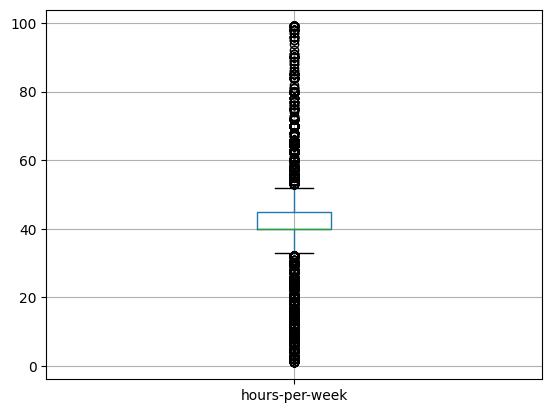

In [14]:
df[['hours-per-week']].boxplot()

In [15]:
# Obteniendo las horas máximas a la semana
max_hours = df['hours-per-week'].max()

# Contando las instancias que cumplen con las horas máximas
df_max_hours = df[df['hours-per-week'] == max_hours]
df_max_hours.shape[0]

85

In [17]:
above_50k_max_hours = df_max_hours[df_max_hours['income'].str.contains(">50K")].shape[0]
below_50k_max_hours = df_max_hours[df_max_hours['income'].str.contains("<=50K")].shape[0]

# Porcentaje de personas que ganan más de 50K al trabajar las horas máximas por semana
print(f'{round((above_50k_max_hours * 100) / df_max_hours.shape[0], 3)} %')

29.412 %


Existen muchos datos atípicos en la feature de horas por semana. El valor máximo es de 99 horas, lo que equivale a 14 horas de trabajo al día. 

85 personas trabajan esa cantidad de horas a la semana, y de ellas, solo el 29.41% (casi el 30%) gana más de 50K anuales.

#### 8. Cuenta el tiempo promedio de trabajo (hours-per-week) de quienes ganan poco y mucho (salario) para cada país (native-country).

In [18]:
# Debido a que la feature 'native-country' contiene datos faltantes, primero tenemos que realizar un rellenado
# El rellenado de datos faltantes se hará en base a la moda de la feature.
above_50k['native-country'].mode(), below_50k['native-country'].mode()

(0     United-States
 Name: native-country, dtype: object,
 0     United-States
 Name: native-country, dtype: object)

Para ambos casos, la moda de 'native-country' es Estados Unidos.

<Axes: title={'center': 'Below 50K - Hours Worked by Native Country'}>

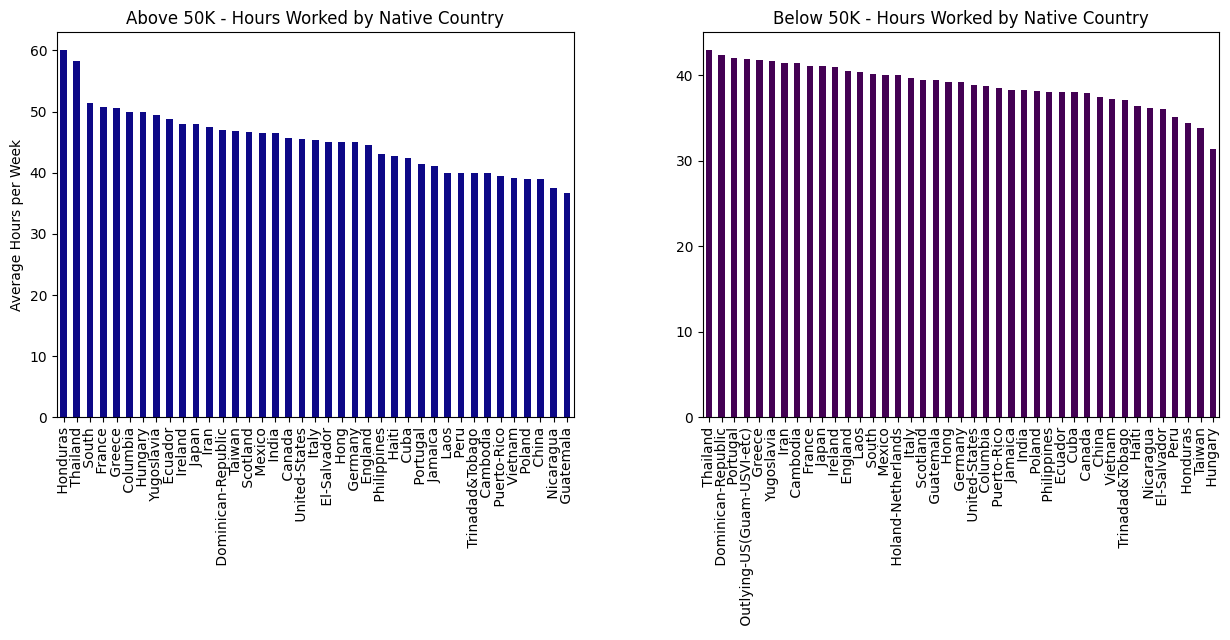

In [19]:
# Rellenado de los datos faltantes
above_50k['native-country'] = above_50k['native-country'].fillna(above_50k['native-country'].mode().loc[0])
below_50k['native-country'] = below_50k['native-country'].fillna(below_50k['native-country'].mode().loc[0])

# Gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
fig.subplots_adjust(wspace=0.25)

above_50k.groupby('native-country')['hours-per-week'].mean().sort_values(ascending=False).plot(kind="bar", ax= axes[0], title="Above 50K - Hours Worked by Native Country", cmap="plasma", xlabel='', ylabel='Average Hours per Week', figsize=[15,5])
below_50k.groupby('native-country')['hours-per-week'].mean().sort_values(ascending=False).plot(kind="bar", ax=axes[1], title="Below 50K - Hours Worked by Native Country", cmap="viridis", xlabel='')

Asumiendo que el país de origen determina parte de la ética laboral de una persona, así como las implicaciones de trabajar en un país extranjero, las gráficas muestran que las personas de países latinoamericanos, asiáticos y europeos suelen trabajar más horas a la semana que sus contrapartes estadounidenses.

Además, a primera vista la gráfica sugiere que las personas que trabajan más horas a la semana suelen ganar más anualmente, pero debido a la cantidad de datos atípicos en esta variable, valdría la pena considerar la mediana como medida representativa.

<Axes: title={'center': 'Below 50K - Hours Worked by Country'}>

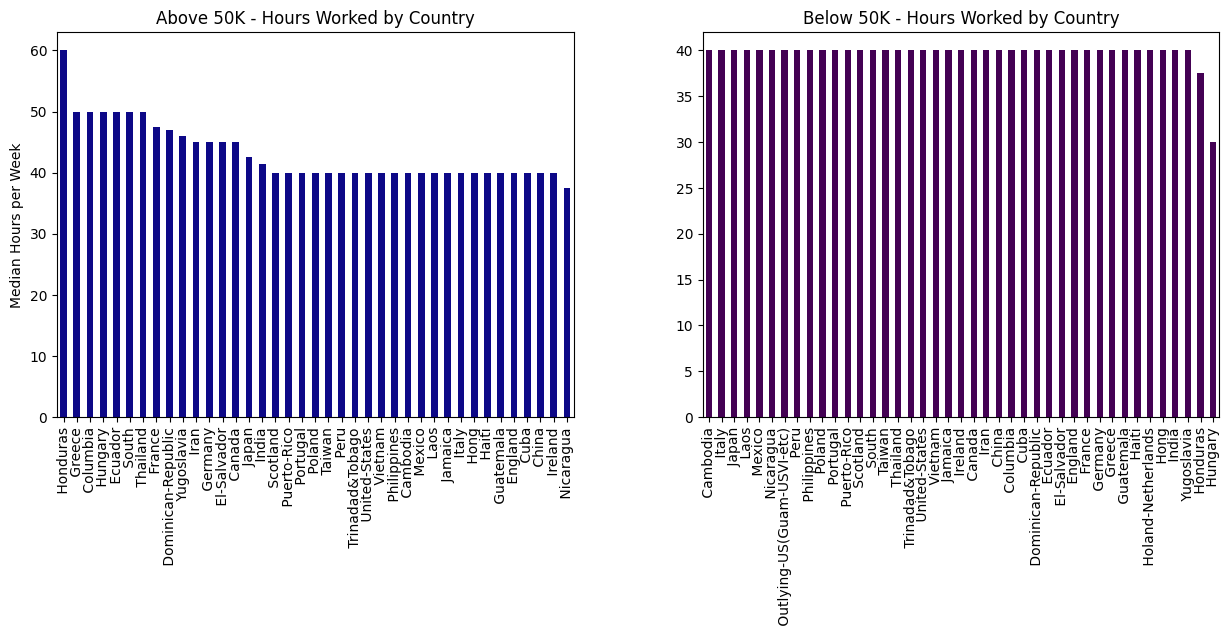

In [20]:
# Gráficos basados en la mediana
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
fig.subplots_adjust(wspace=0.25)

above_50k.groupby('native-country')['hours-per-week'].median().sort_values(ascending=False).plot(kind="bar", ax= axes[0], title="Above 50K - Hours Worked by Country", cmap="plasma", xlabel='', ylabel='Median Hours per Week', figsize=[15,5])
below_50k.groupby('native-country')['hours-per-week'].median().sort_values(ascending=False).plot(kind="bar", ax=axes[1], title="Below 50K - Hours Worked by Country", cmap="viridis", xlabel='')

Eliminando la influencia de los valores atípicos con la mediana, podemos observar que las horas laboradas a la semana de aquellas personas que ganan menos de 50K son prácticamente las mismas (40 hrs), independientemente del país de origen.

De nuevo, las personas que ganan más suelen trabajar más de 40hrs a la semana, y mayormente provienen de países latinoamericanos (Honduras, Colombia, Ecuador), asiáticos (Corea del Sur, Tailandia) y europeos (Grecia, Francia).

Sin embargo, esto no es representativo de la frecuencia con la que esto ocurre. Porque aunque a primera vista las gráficas sugieren eso, desconocemos la propensión a que suceda el caso. Los arriba mencionados pueden ser casos aislados o excepcionales que no tienen bases sólidas.

In [21]:
df['native-country'].value_counts()[0:15]

native-country
United-States         29170
Mexico                  643
Philippines             198
Germany                 137
Canada                  121
Puerto-Rico             114
El-Salvador             106
India                   100
Cuba                     95
England                  90
Jamaica                  81
South                    80
China                    75
Italy                    73
Dominican-Republic       70
Name: count, dtype: int64

Y lo que sucede es, existe un caso de oversampling en las entradas de los países. La mayoría de los datos se concentran en Estados Unidos, lo que reduce el peso y la diversidad de las demás variables. Esto complica conocer la frecuencia de cada caso, porque no tenemos suficientes instancias de comparación.

<Axes: title={'center': 'Below 50K - Hours Worked'}, ylabel='Median Hours per Week'>

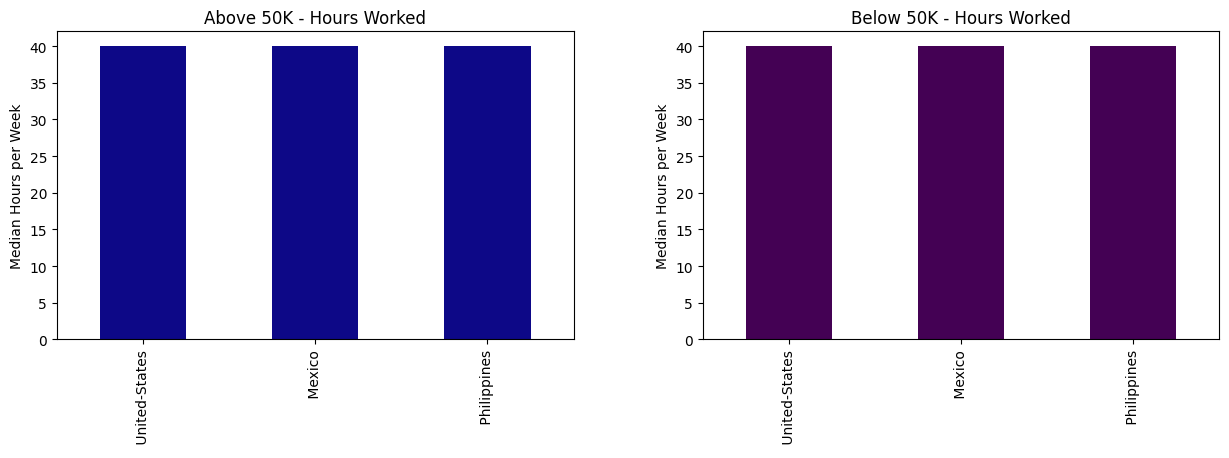

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
fig.subplots_adjust(wspace=0.25)

pd.DataFrame(above_50k.groupby('native-country')['hours-per-week'].median().sort_values(ascending=False)).loc[[' United-States', ' Mexico', ' Philippines']].plot(kind="bar", ax= axes[0], title="Above 50K - Hours Worked", cmap="plasma", xlabel='', ylabel='Median Hours per Week', legend=False)
pd.DataFrame(below_50k.groupby('native-country')['hours-per-week'].median().sort_values(ascending=False)).loc[[' United-States', ' Mexico', ' Philippines']].plot(kind="bar", ax= axes[1], title="Below 50K - Hours Worked", cmap="viridis", xlabel='', ylabel='Median Hours per Week', legend=False)

Las gráficas arriba contemplan a los 3 países con mayores instancias, y en los tres no hay variaciones respecto a las horas trabajadas en la mediana. 

<Axes: title={'center': 'Below 50K - Hours Worked'}, ylabel='Median Hours per Week'>

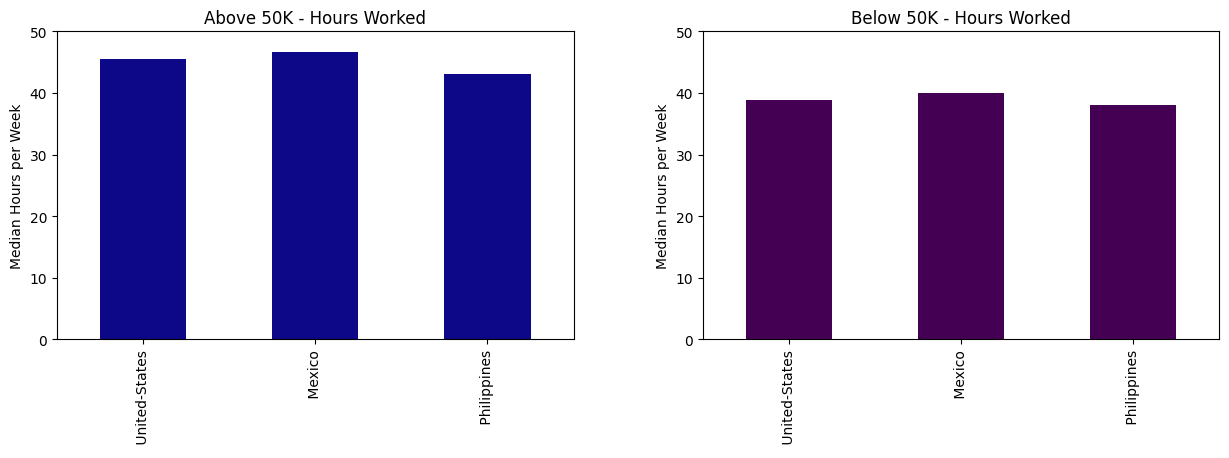

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
fig.subplots_adjust(wspace=0.25)

pd.DataFrame(above_50k.groupby('native-country')['hours-per-week'].mean().sort_values(ascending=False)).loc[[' United-States', ' Mexico', ' Philippines']].plot(kind="bar", ax= axes[0], title="Above 50K - Hours Worked", cmap="plasma", xlabel='', ylabel='Median Hours per Week', legend=False, ylim=(0,50))
pd.DataFrame(below_50k.groupby('native-country')['hours-per-week'].mean().sort_values(ascending=False)).loc[[' United-States', ' Mexico', ' Philippines']].plot(kind="bar", ax= axes[1], title="Below 50K - Hours Worked", cmap="viridis", xlabel='', ylabel='Median Hours per Week', legend=False, ylim=(0,50))

En el promedio existe variación, en parte atribuida a los valores atípicos.

#### Análisis por Género

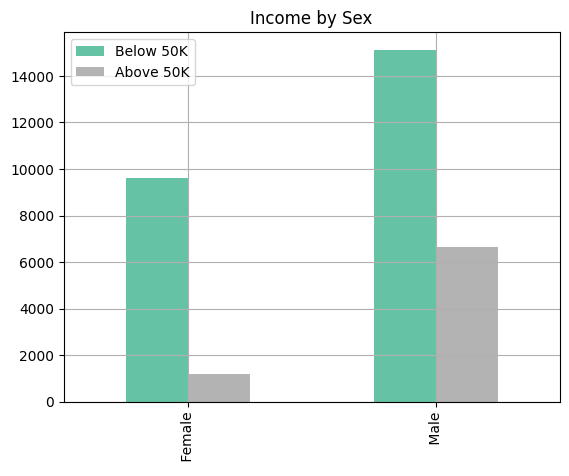

In [24]:
income_by_sex = df.groupby(['income', 'sex']).size().unstack('income').rename_axis(columns=None)

income_by_sex.plot(kind='bar', cmap='Set2', xlabel='', title='Income by Sex', grid=True).legend(["Below 50K", "Above 50K"])

In [25]:
income_by_sex.reset_index()

,sex,<=50K,>50K
0,Female,9592,1179
1,Male,15128,6662


In [26]:
sex_income_ratio = income_by_sex[' >50K'].iloc[1]/income_by_sex[' >50K'].iloc[0]
sex_income_ratio * 2

11.301102629346904

In [27]:
women_income_percentage = income_by_sex[' >50K'].iloc[0] * 100 / income_by_sex[' >50K'].sum()
women_income_percentage

15.036347404667772

Decidí comparar la relación entre el sexo de las personas con lo que ganan al año, debido a la brecha laboral que existe entre ambos sexos. No sorprendentemente, los hombres suelen ganar más que las mujeres. 

Por cada 11 hombres que ganen arriba de 50K, habrían 2 mujeres que ganen lo mismo. Además, las mujeres representan el 15% de aquellas personas que ganan arriba de 50K. 

In [28]:
# Estado matrimonial de las mujeres que ganan más de 50K
women_above_50k = above_50k.groupby(['marital-status', 'sex']).size().unstack().drop(' Male', axis=1)
women_above_50k = pd.DataFrame(women_above_50k, columns=[' Female']).reset_index()

# Mujeres casadas que ganan más de 50K
married_women_above_50k = women_above_50k[women_above_50k['marital-status'].str.contains('Married')]
married_women_above_50k

,marital-status,Female
1,Married-AF-spouse,6
2,Married-civ-spouse,754
3,Married-spouse-absent,11


In [29]:
# Mujeres NO casadas que ganan más de 50K
unmarried_women_above_50k = women_above_50k[women_above_50k['marital-status'].str.contains('Married') == False]
unmarried_women_above_50k

,marital-status,Female
0,Divorced,179
4,Never-married,166
5,Separated,17
6,Widowed,46


En cuanto al matrimonio, las mujeres conservan la tendencia de tener mayores sueldos si están casadas.

#### Análisis por Edad

<Axes: title={'center': 'Ages of Income Below 50K'}, ylabel='Frequency'>

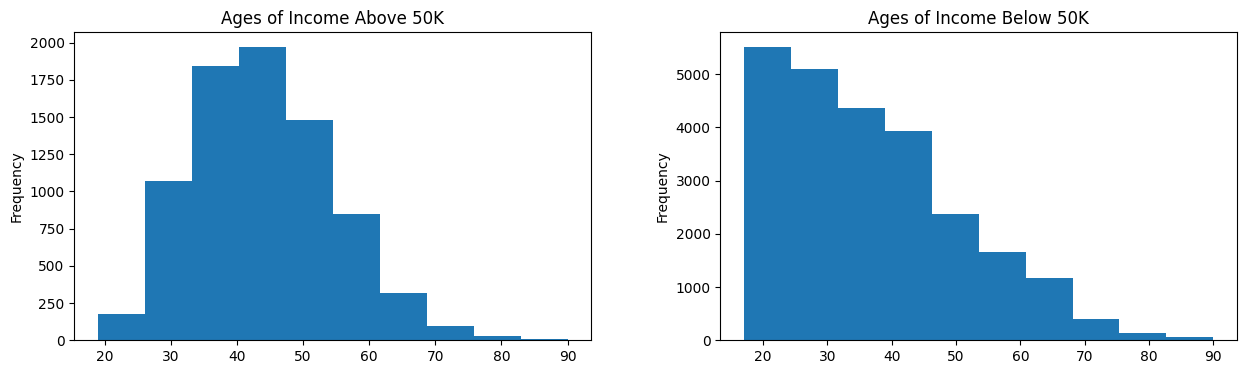

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
fig.subplots_adjust(wspace=0.25)

above_50k['age'].plot(kind='hist', ax=axes[0], title='Ages of Income Above 50K')
below_50k['age'].plot(kind='hist', ax=axes[1], title='Ages of Income Below 50K')

La mayoría de las personas que ganan debajo de 50K anuales son personas jóvenes. Esto podría explicarse en que probablemente estén teniendo sus primeros trabajos o tengan trabajos de medio tiempo. Pero conforme aumenta la edad, también lo hace el salario anual.



#### Análisis por Workclass

In [31]:
# Rellenado de valores faltantes
df['workclass'] = df['workclass'].fillna(df['workclass'].mode().loc[0])

# Agrupamiento del income en base a workclass
income_by_workclass = df.groupby(['income', 'workclass']).size().unstack('income').rename_axis(columns=None)
income_by_workclass

,<=50K,>50K
workclass,,
Federal-gov,589.0,371.0
Local-gov,1476.0,617.0
Never-worked,7.0,NaN
Private,19378.0,5154.0
Self-emp-inc,494.0,622.0
Self-emp-not-inc,1817.0,724.0
State-gov,945.0,353.0
Without-pay,14.0,NaN


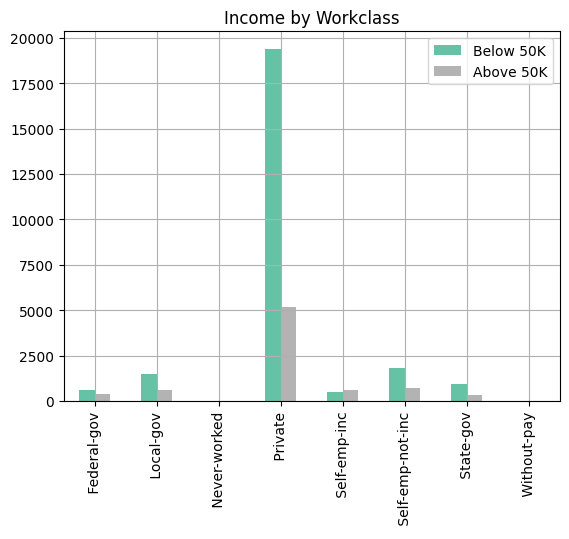

In [32]:
# En este caso, los NaNs de las personas que ganan arriba de 50K se debe a que el número de instancias es 0, así que rellenaremos la feature
income_by_workclass = income_by_workclass.fillna(0)

# Gráfico 
income_by_workclass.plot(kind='bar', cmap='Set2', xlabel='', title='Income by Workclass', grid=True).legend(["Below 50K", "Above 50K"])

Las personas que ganan menos de 50K comprenden personas que nunca han trabajado o que no reciben paga por sus servicios, lo que explica que pertenezcan a esta categoría.

No hay una categoría que garantice una mayor probabilidad de tener un salario alto, evidenciado claramente por las personas que trabajan en el sector privado. Mientras que es la clase que más ofrece altos salarios, también es la que recibe a la mayor cantidad de personas con salarios menores a 50K anuales. 

La única categoría donde aquellas personas que ganan más de 50K supera al otro grupo es 'Self-emp-inc', que describe a personas que trabajan para sí mismas en corporaciones. Aunque la diferencia es pequeña. 

#### Análisis por Relationship

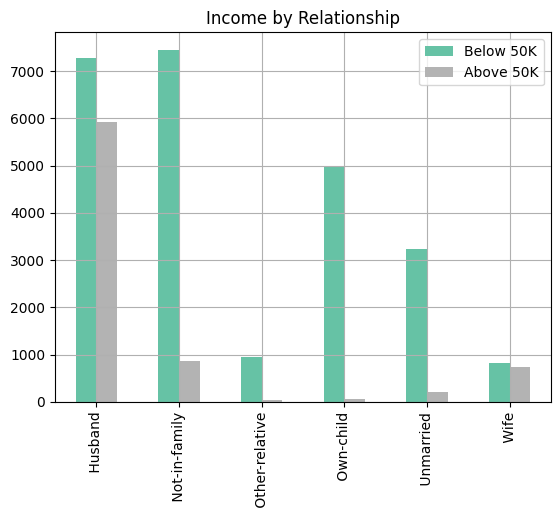

In [33]:
income_by_relationship = df.groupby(['income', 'relationship']).size().unstack('income').rename_axis(columns=None)

income_by_relationship.plot(kind='bar', cmap='Set2', xlabel='', title='Income by Relationship', grid=True).legend(["Below 50K", "Above 50K"])

La relación representa la relación de le encuestade con su familia. En la gráfica de arriba, se puede observar que este factor determina el salario de una persona: personas fuera de familia, no casadas y personas menores de 18 no suelen ganar más de 50K anuales.

#### Análisis por Raza

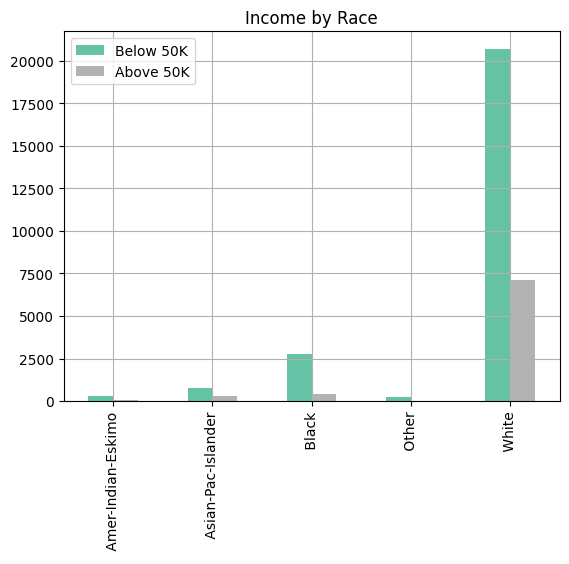

In [34]:
income_by_race = df.groupby(['income', 'race']).size().unstack('income').rename_axis(columns=None)

income_by_race.plot(kind='bar', cmap='Set2', xlabel='', title='Income by Race', grid=True).legend(["Below 50K", "Above 50K"])

Como se puede observar en la gráfica, existe un oversampling de personas blancas en la encuesta. Para tener medidas significativas, tendríamos que tratar este exceso de datos primero. Sin embargo, con un análisis visual de las razones en cada categoría, podemos observar la importancia de la raza en el suelo anual de una persona, lo cual se puede derivar de cuestiones sociales.

#### 9. Si fueras a hacer un modelo, ¿qué variables crees que no haría sentido agregar al análisis?

C:\Users\Viviana\AppData\Local\Temp\ipykernel_13000\1431582850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].replace([' <=50K', ' >50K'],[0,1],inplace=True)
C:\Users\Viviana\AppData\Local\Temp\ipykernel_13000\1431582850.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['incom

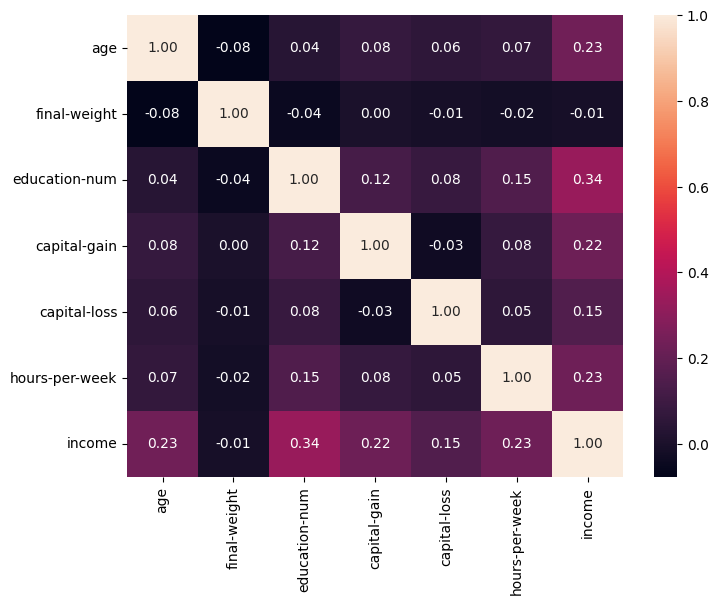

In [35]:
# Codificando los valores de income
df['income'].replace([' <=50K', ' >50K'],[0,1],inplace=True)

# Matriz de correlación
correlation_matrix = df[['age', 'final-weight', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']].corr()

# Crear un heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

Education, ya que contamos con la variable codificada 'education-number', lo que le facilita al modelo interpretar la variable. Además de que sería redundante tener dos features que hablen de lo mismo.

Final weight, porque en la matriz de correlación, sus valores son muy bajos. Esto ocasiona que no tenga relevancia estadística.

Income, porque es la target variable.

Y tendría dudas respecto al sexo por cuestiones éticas, aunque claramente tiene relevancia. Al igual que con la raza, aunque su diferencia es menor.

#### 10. ¿Los datos necesitan algún tipo de escalamiento? Si es así, ¿qué método de escalamiento utilizarías y porqué?

Los datos necesitan escalamiento debido a los valores atípicos y diferencias de escala entre cada variable. Por ejemplo, horas por semana debería de ser transformado para acomodar una distribución normal y no tan sesgada.

Utilizaría el método de normalización porque no tenemos valores negativos y utilizaremos un modelo categórico basado en las distancias de cada feature.

#### 11. ¿Cuál es la proporción de personas que ganan más de 50K por año comparado con las que ganan menos de 50K?

In [36]:
below_50k.count().iloc[0]/above_50k.count().iloc[0]

3.152659099604642

Aproximadamente, por cada 3 personas que ganan menos de 50K anuales, hay 1 persona que gana arriba de 50K.

# Conclusión

#### 12. Dado todo el análisis que hiciste (y si gustas agregar más cosas para poder hacer la conclusión), ¿cuáles son los factores/razones que definirías para decir que una persona puede tener un salario más alto?

Las features que más peso tienen para determinar la ganancia anual de una persona son: el sexo, estado matrimonial, relación familiar, workclass, education, hours per week y raza, en ese orden. 

Por desgracia, muchas de las instancias en el dataset están sesgadas por juicios morales y estructuras de opresión, como el sexo, origen de una persona y raza. También, la diversidad en los datos es muy poca, habiendo encuestado en su mayoría a hombres blancos estadounidenses, lo cual no solo lo hace susceptible al oversampling, sino que también reduce la generalización de los datos a mano. 

Eso me hace cuestionar la utilización del modelo con poblaciones fuera de las encuestadas, así como los motivos y usos que se le pueda dar a un modelo con estos datos.